<a href="https://colab.research.google.com/github/guscldns/TestProject/blob/main/%EA%B8%B0%EC%B4%88%ED%86%B5%EA%B3%84/inreg_backward_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 선형회귀 만들기 목적함수 구현



In [ ]:
import matplotlib.pyplot as plt

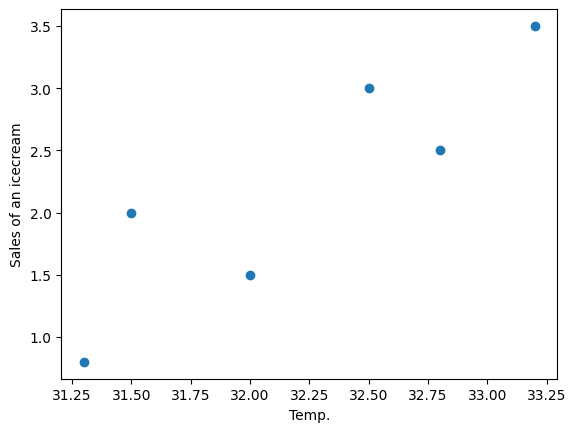

In [ ]:
X = [31.3, 31.5, 32.0, 32.5, 32.8, 33.2]
y = [0.8, 2.0, 1.5, 3.0, 2.5, 3.5]

plt.plot(X, y, 'o')
plt.xlabel('Temp.')
plt.ylabel('Sales of an icecream')
plt.show()

D = {'data':X, 'target':y}

- 온도와 아이스크림 판매량 간의 관계를 직선으로 표시하고 싶습니다.

- 모델은 $ y = w_1 x + w_0 $ 될 것이며 여기서 $x$는 온도 $y$는 아이스크림 판매량입니다.

-  `Loss`클래스를 정의 합니다. 손실함수를 일반적인 `def func()`형태로 정의 하지 않고 클래스 형태로 정의하는 이유는 이 함수의 값을 구하기 위해서는 `X`와 `y`가 필요하기 때문입니다. 즉, 데이터가 필요합니다.

- 이 데이터를 클래스의 내부 자료로 가지고 있으면 좀 더 명확하게 손실 함수 코드를 작성할 수 있습니다.

- 손실함수 값은 다음처럼 계산됩니다.

$$
L(\mathbf{w}) = \frac{1}{2} \sum_{i=1}^{N} \left( \hat{y}_i(x_i;\mathbf{w}) - y_i \right)^2
$$

- 위 식에서 $\hat{y}_i$는 다음처럼 모델의 출력입니다.

$$
\hat{y}_i = w_1 x_i + w_0
$$

- 위 식으로 부터 이제는 최적화 시켜야할 변수(parameter)가 두 개라는 것을 알 수 있습니다.



- 이제 위 손실함수의 함수값을 계산하는 `forward()`와 미분 계수를 계산하는 `backward()` 함수를 가지는 클래스를 작성합니다.

- 위 예시를 잘 확인하고 다음 순서로 코드를 작성하세요.
    - numpy 모듈을 임포트 합니다.
    - 동일한 데이터 `X`, `y`를 넘파이 어레이로 정의 합니다.
    - `Loss` 클래스의 `forward()`, `backward()`를 완성합니다.
    


In [ ]:
# numpy 모듈 임포트
import numpy as np

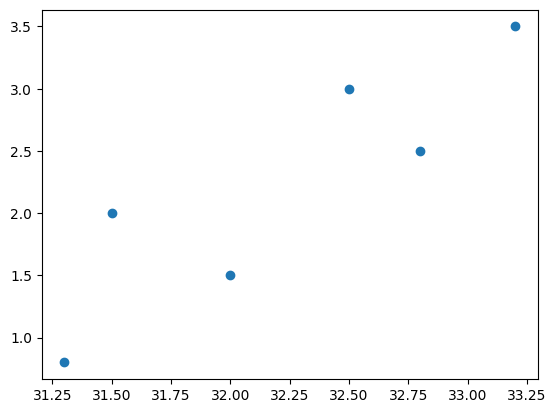

In [ ]:
# numpy array로 데이터 재정의
X = np.array([31.3, 31.5, 32.0, 32.5, 32.8, 33.2])
y = np.array([0.8, 2.0, 1.5, 3.0, 2.5, 3.5])

plt.plot(X, y, 'o')
plt.show()

In [ ]:
# 임의의 매개변수 w에 대해서 모든 x에 대한 y값 구해보기
w = np.random.randn(2)
print(w)
for x in X:
    print(w[0] * x + w[1]*1)

[-1.58800901  0.43358547]
-49.27109652430933
-49.58869832622087
-50.38270283099972
-51.176707335778566
-51.65311003864588
-52.288313642468964


In [ ]:
# 위 루프 버전을 np.dot()로 만들기 위해 X를 2차원 데이터로 변환
X_ = np.concatenate([X.reshape(-1,1), np.ones_like(X.reshape(-1,1))], axis=1)
X_

array([[31.3,  1. ],
       [31.5,  1. ],
       [32. ,  1. ],
       [32.5,  1. ],
       [32.8,  1. ],
       [33.2,  1. ]])

- 이제 $\hat{y}_i$(예측값)를 다음처럼 표현 가능합니다.

$$
\hat{y}_i = \mathbf{w} \cdot \mathbf{x}_i
$$

In [ ]:
# np.dot()로 y값 계산
np.dot(X_, w)

array([-49.27109652, -49.58869833, -50.38270283, -51.17670734,
       -51.65311004, -52.28831364])

- 손실함수를 적당히 미분한 도함수는 다음처럼 주어 집니다.

$$
\frac{\partial }{\partial \mathbf{w}} L(\mathbf{w}) = \sum_{i=1}^N \left(  \mathbf{w} \cdot \mathbf{x}_i - y_i \right) \mathbf{x}^\intercal_i
$$

In [ ]:
class Loss:
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.N = len(self.X) # X 길이 = 데이터 개수

        # 우리가 구해야 하는 파라미터 w, 최초는 무작위로 설정
        self.w = np.random.randn(X.shape[1])

        # 코스트 초기화
        self.cost = 0.0

        # 미분 계수 초기화
        self.dw = 0.0

    def forward(self, w, X, y):
        self.cost = 0.5 * np.sum( (np.dot(X, w) - y)**2 )

        return self.cost


    def backward(self, w, X, y):
        # sum_i { (w^T * x_i) - y_i} x_i^T
        # w: (D,)
        # X: (N,D)

        ####################################################
        # for loop
        grad = np.zeros(X.shape[1])

        for i in range(self.N):
            grad += (np.dot(X[i], w) - y[i]) * X[i]

        self.dw = grad
        ####################################################

        ####################################################
        # numpy(for 루프 값과 동일)
        # (N,)       (D,N)       (N,)
        # self.dw = np.dot(X.T, np.dot(X,w) - y)
        ####################################################

        return self.dw


In [ ]:
loss = Loss(X_, y)

- 임의의 $\mathbf{w}$에 대해서 `forward()`, `backward()` 계산 실험합니다.


In [ ]:
# 여기에 코드를 작성하세요.
w = np.random.randn(2)

print("w")
print(w)

print("\nJ(w)")
print(loss.forward(w, X_, y))

print("\n∇J(w)")
print(loss.backward(w, X_, y))

w
[-1.56863737 -0.16402425]

J(w)
8411.609230562986

∇J(w)
[-10236.48024103   -317.50174932]


- 위 계산된 `forward()`, `backward()`가 바르게 계산되었는지 확인하기 위해 "sanity check"를 합니다.

- 수치 미분 함수를 사용해서 구한 미분계수와 `backward()`의 결과가 거의 비슷해야 합니다.

In [ ]:
def numer_deriv(x, fun, args=(), h=None, method="central", dtype='float32'):
    """
    Find the first derivative of a function at a point x.

    x     : The point at which derivative is found.
    fun   : Input function.
    args  : Tuple extra arguments passed to fun.
    h     : Step size
    method: 'central' or 'forward'
    dtype : Data type of gradient, must be set to 'longdouble'
            if numerically unstable.
    """

    # [1] 필요변수 초기화
    scalar = False
    m = 1

    # [2] x가 스칼라인지 벡터인지 확인 스칼라면 무조건 벡터로 고치고 시작
    if not hasattr(type(x), '__iter__'):
        x = np.array([x])
        scalar = True

    # [3] x 타입을 디폴트로 float32로 변경
    x = x.astype(dtype)

    # [4] 미분 계수 초기화
    g = np.zeros(x.shape[0]).astype(dtype)

    # [5] 미분계수를 변수 개수만큼 루프를 돌면서 구하기
    for i in range(x.shape[0]) :
        # [5-1]변경된 위치를 설정할 변수 두개를 준비
        # dx1[i], dx2[i]로 각 변수의 요소를 접근할 수 있음
        dx1 = x.copy()
        dx2 = x.copy()

        # [5-2] h 결정 대충 변수의 1%정도
        # https://en.wikipedia.org/wiki/Numerical_differentiation
        if h == None:
            h = np.sqrt(np.finfo(np.float32).eps) if x[i] == 0.0 else np.sqrt(np.finfo(np.float32).eps) * x[i]

        ##########################################
        # WRITE YOUR CODE HERE
        # [5-3*] dx1[i] 변경
        dx1[i] += h

        # [5-4*] central이면 dx[2]도 함께 변경, 이 때 m = 2로 설정해서
        # [5-5]에서 g[i]를 계산할 때 2h로 나누게 해야함.
        if method == "central":
            dx2[i] -= h
            m = 2

        # [5-5*] 미분계수 계산
        # fun이 스칼라 함수여도 요소 한개짜리 ndarray로 전달되면 문제없이
        # 호출되므로 여기거 fun은 fun(dx1, *args) 식으로 호출되면 됨
        g[i] = (fun(dx1, *args) - fun(dx2, *args)) / (m*h)
        ##########################################

    # [6] 결과값 리턴
    if scalar:
        return g[0]
    else:
        return g

In [ ]:
print("w")
print(w)

print("\nL(w)")
print(loss.forward(w, X_, y))

print("\nnumerical ∇L(w)")
print(numer_deriv(w, loss.forward, args=(X_, y)))

print("\n∇L(w)")
print(loss.backward(w, X_, y))

w
[-1.56863737 -0.16402425]

L(w)
8411.609230562986

numerical ∇L(w)
[-10235.896    -317.5011]

∇L(w)
[-10236.48024103   -317.50174932]
